In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("cancer_patient_data_sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df = df.drop('Patient Id', axis=1)
df = df.drop('index', axis=1)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [6]:
print('Cancer Levels: ', df['Level'].unique())
map = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(map, inplace=True)
print('Cancer Levels: ', df['Level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [7]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


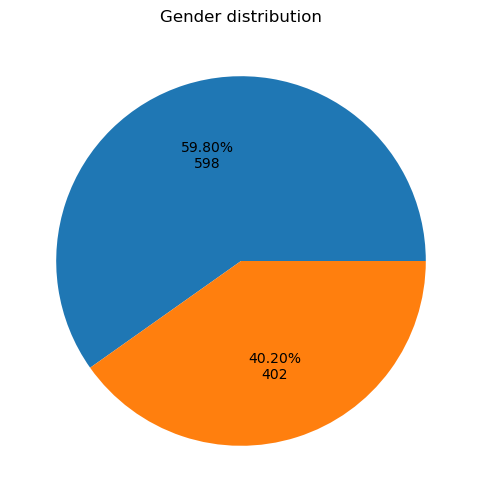

In [8]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(),
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df['Gender'].value_counts()) / 100))
plt.title('Gender distribution')
plt.show()

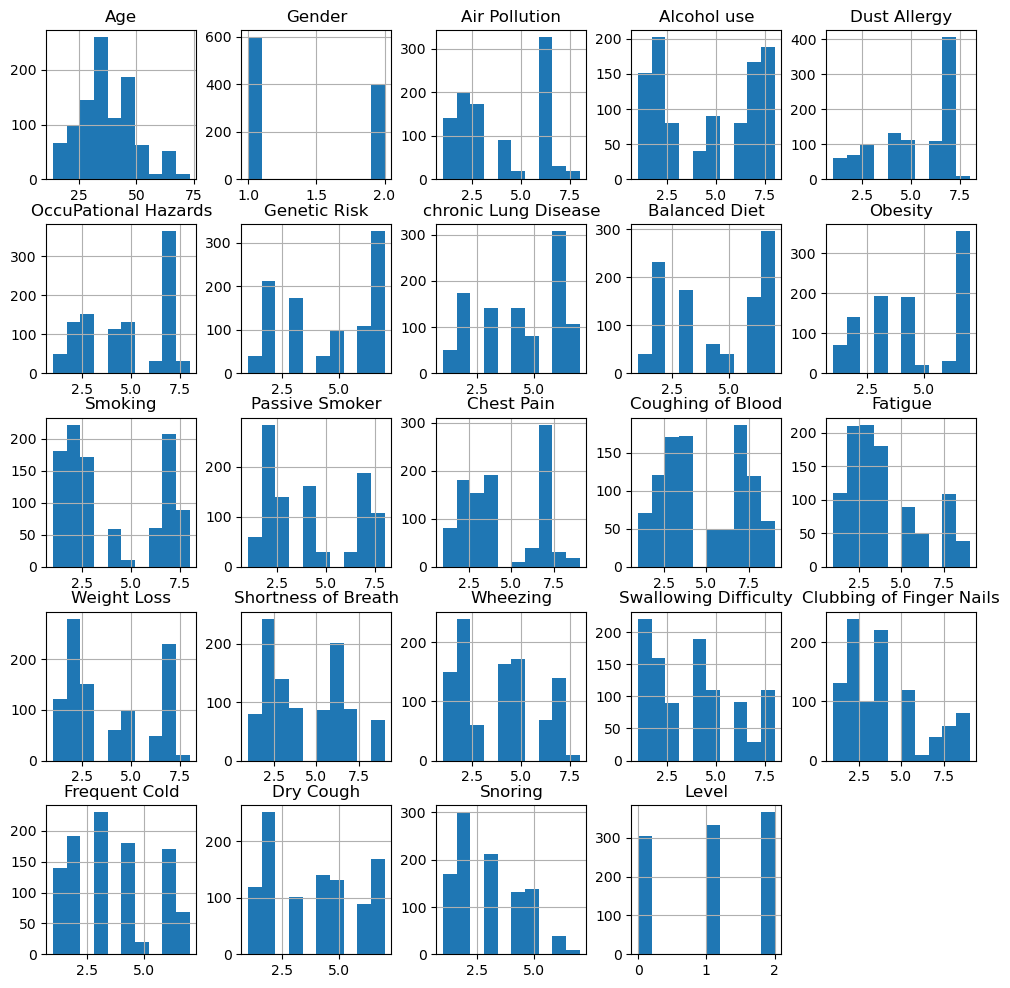

In [9]:
df.hist(figsize=(12,12))
plt.show()

Models

In [10]:
df['Level'].value_counts()

Level
2    365
1    332
0    303
Name: count, dtype: int64

In [11]:
# Separate the Features (X) from the Target (y)

X=df.drop('Level',axis=1)

y=df['Level']

In [12]:
# split the data into testing and training sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

Logistic regression without scaling 

In [13]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_reg = LogisticRegression(solver='liblinear', max_iter=400, random_state=1)

In [14]:
#  Fit (train) or model using the training data
logistic_model = logistic_reg.fit(X_train, y_train)

In [15]:
#Generate testing predictions
testing_prediction = logistic_reg.predict(X_test)
pd.DataFrame({"Prediction": testing_prediction, "Actual": y_test})

#Generate training predictions
training_prediction = logistic_model.predict(X_train)
pd.DataFrame({"Prediction": training_prediction, "Actual": y_train})

,Prediction,Actual
731,1,1
716,0,0
640,1,1
804,1,1
737,1,1
...,...,...
767,2,2
72,1,1
908,2,2
235,0,0


In [16]:
# Generate a confusion matrix for the testing data
testing_matrix = confusion_matrix(y_test, testing_prediction)

print(testing_matrix)

[[ 89   0   0]
 [  5  88   3]
 [  0   0 115]]


In [17]:
# Create a confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_prediction)

# Print the confusion matrix for the training data
print(training_matrix)

[[213   1   0]
 [  9 223   4]
 [  0   0 250]]


In [18]:
# Print the classification report for the testing model
testreport = classification_report(y_test, testing_prediction)
accuracy_lr = accuracy_score(y_test, testing_prediction)
print(testreport)
print("Accuracy score is ", accuracy_lr)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        89
           1       1.00      0.92      0.96        96
           2       0.97      1.00      0.99       115

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Accuracy score is  0.9733333333333334


In [19]:
# Print the classification report for the training model
trainreport = classification_report(y_train, training_prediction)
print(trainreport)
accuracy_train = accuracy_score(y_train, training_prediction)
print("Accuracy score is ", accuracy_train)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       214
           1       1.00      0.94      0.97       236
           2       0.98      1.00      0.99       250

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700

Accuracy score is  0.98


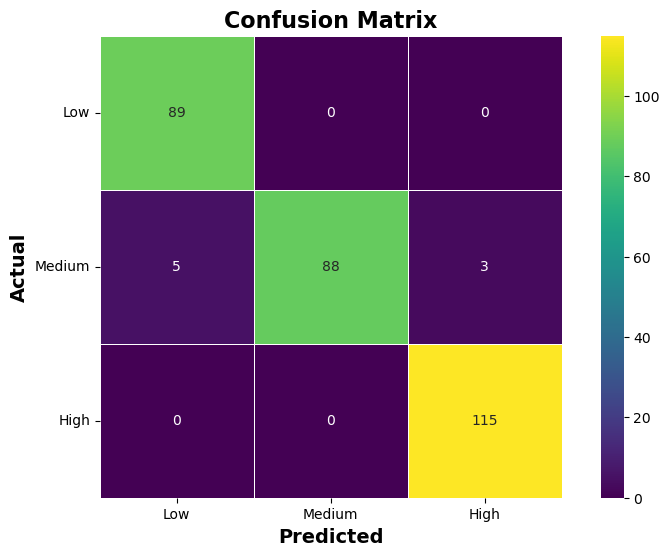

In [20]:
cm = confusion_matrix(y_test, testing_prediction)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

Logistic regression with scaled data

In [37]:
# scale the data 
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [38]:
# apply logistic regression to the scale data
log_reg_scaled = LogisticRegression(solver='liblinear', random_state=42)
log_reg_scaled.fit(X_train_scaled, y_train)
y_pred_standard = log_reg_scaled.predict(X_test_scaled)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print("Accuracy with Standard scaling:", accuracy_standard)

Accuracy with Standard scaling: 0.9766666666666667


Random Forest Classifier

In [39]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [40]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [41]:
# Making predictions using the testing data
predictions_rf = rf_model.predict(X_test_scaled)

In [42]:
# create a confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
cm_rf

array([[ 89,   0,   0],
       [  0,  96,   0],
       [  0,   0, 115]], dtype=int64)

In [43]:
print(classification_report(y_test, predictions_rf))
# Calculating the accuracy score
acc_score_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy with random forest classifier:", acc_score_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy with random forest classifier: 1.0


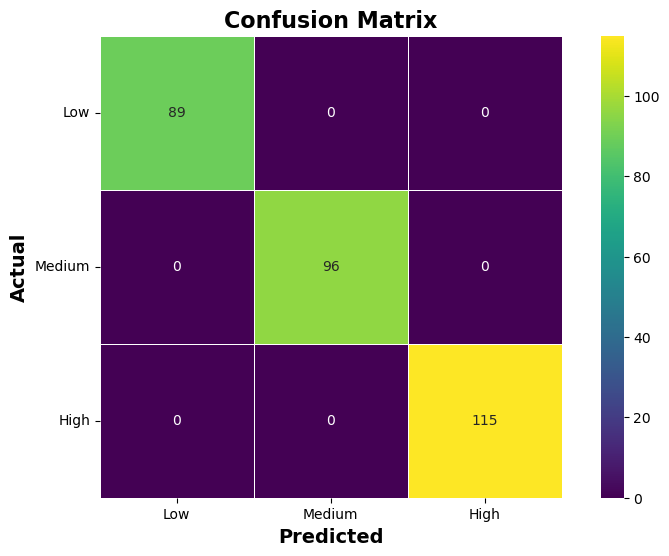

In [44]:
cm = confusion_matrix(y_test, predictions_rf)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

In [45]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10056609800759561, 'Coughing of Blood'),
 (0.09982462741734291, 'Passive Smoker'),
 (0.09473833295924546, 'Wheezing'),
 (0.09054467849839024, 'Obesity'),
 (0.06516123724451608, 'Fatigue'),
 (0.04991297463313656, 'Alcohol use'),
 (0.04672926307628158, 'Balanced Diet'),
 (0.045064700289367, 'Swallowing Difficulty'),
 (0.04114055538308128, 'Shortness of Breath'),
 (0.03808971204997921, 'OccuPational Hazards'),
 (0.037265167523519105, 'Smoking'),
 (0.03715993160303727, 'Snoring'),
 (0.03596446692966774, 'Air Pollution'),
 (0.034399499954942334, 'Dust Allergy'),
 (0.03191866407955516, 'Genetic Risk'),
 (0.03176657899712418, 'Chest Pain'),
 (0.03175378754870881, 'Clubbing of Finger Nails'),
 (0.024172169992254387, 'Frequent Cold'),
 (0.022548184882613405, 'Weight Loss'),
 (0.01796019100380466, 'Dry Cough'),
 (0.01623988610098964, 'chronic Lung Disease'),
 (0.006672593299242602, 'Age'),
 (0.0004066985256047737, 'Gender')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

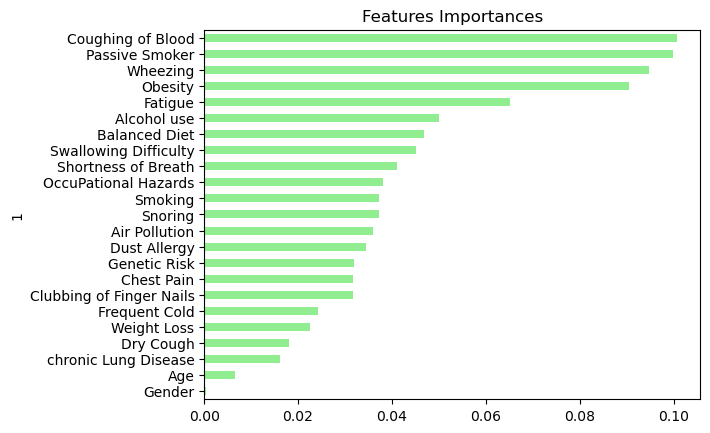

In [46]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Decision tree model

In [47]:
# Creating the decision tree classifier instance
dtc = DecisionTreeClassifier()

In [48]:
# Fitting the model
dtc_model = dtc.fit(X_train_scaled, y_train)

In [49]:
# Making predictions using the testing data
dtc_predictions = dtc_model.predict(X_test_scaled)

In [50]:
# creating a confusion matrix
cm_dtc = confusion_matrix(y_test, dtc_predictions)
cm_dtc

array([[ 89,   0,   0],
       [  0,  96,   0],
       [  0,   0, 115]], dtype=int64)

In [51]:
print(classification_report(y_test, dtc_predictions))
# Calculating the accuracy score
acc_score_dtc = accuracy_score(y_test, dtc_predictions)
print("Accuracy with decision tree classifier:", acc_score_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy with decision tree classifier: 1.0


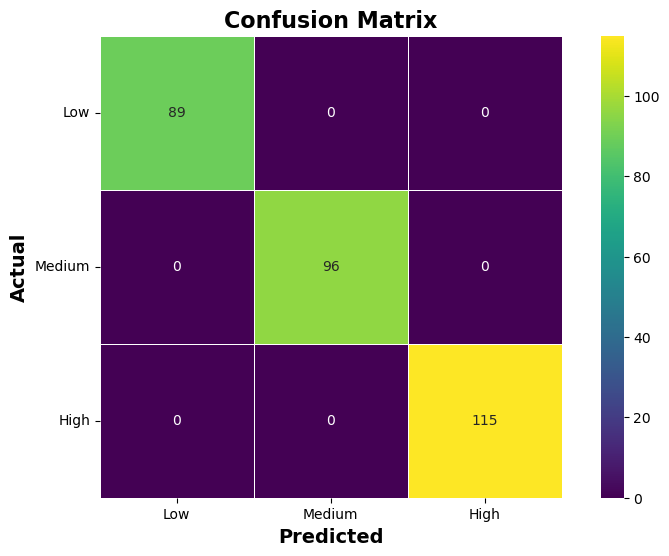

In [52]:
cm = confusion_matrix(y_test, dtc_predictions)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

KNN model

In [53]:
# Instantiate the model with k = 3 neighbours
knn = KNeighborsClassifier(n_neighbors=3)

In [55]:
 # Train the model
knn_model = knn.fit(X_train_scaled, y_train)

In [57]:
# Create predictions
knn_predictions = knn_model.predict(X_test_scaled)
knn_predictions

array([1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1], d

In [60]:
# creating a confusion matrix
cm_knn = confusion_matrix(y_test, knn_predictions)
cm_knn

array([[ 89,   0,   0],
       [  0,  96,   0],
       [  0,   0, 115]], dtype=int64)

In [61]:
print(classification_report(y_test, knn_predictions))
# Calculating the accuracy score
acc_score_knn = accuracy_score(y_test, knn_predictions)
print("Accuracy with decision tree classifier:", acc_score_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy with decision tree classifier: 1.0


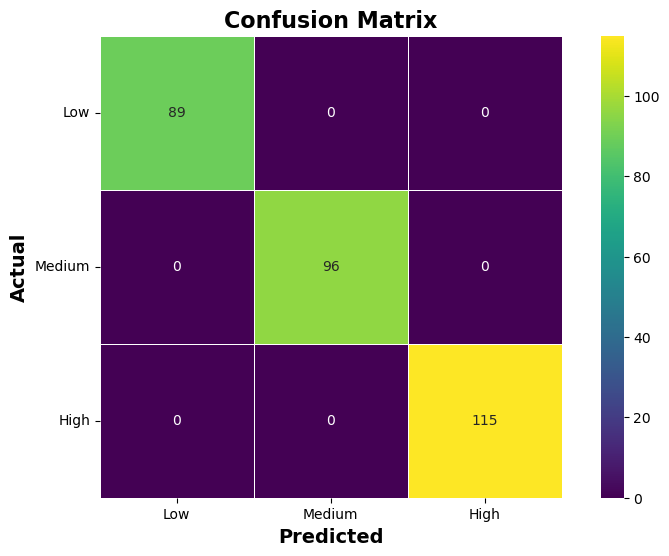

In [62]:
cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()